In [2]:
# Importação dos pacotes
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
import plotly.graph_objects as go # gráficos 3D
from scipy.stats import pearsonr # correlações de Pearson
import statsmodels.api as sm # estimação de modelos
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from sklearn.preprocessing import LabelEncoder # transformação de dados
from playsound import playsound # reprodução de sons
import pingouin as pg # outro modo para obtenção de matrizes de correlações
import emojis # inserção de emojis em gráficos
from statstests.process import stepwise # procedimento Stepwise
from statstests.tests import shapiro_francia # teste de Shapiro-Francia
from scipy.stats import boxcox # transformação de Box-Cox
from scipy.stats import norm # para plotagem da curva normal
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'


playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [3]:
df_tempodist = pd.read_csv('/home/usp_ds_analytics/regression_analysis/data/tempodist.csv')
df_tempodist.head()

,tempo,distancia
0,15,8
1,20,6
2,20,15
3,40,20
4,50,25


In [4]:
# Características das variáveis do dataset
df_tempodist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tempo      10 non-null     int64
 1   distancia  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [5]:
# Estatísticas univariadas
df_tempodist.describe()

,tempo,distancia
count,10.00000,10.000000
mean,30.00000,17.000000
std,14.90712,9.510228
min,10.00000,5.000000
25%,20.00000,8.750000
50%,27.50000,17.500000
75%,38.75000,23.750000
max,55.00000,32.000000


Gráfico de dispersão com o ajuste linear (fitted values de um modelo
de regressão) que se adequa às observações: função 'regplot' do pacote 'seaborn'

<function matplotlib.pyplot.show(close=None, block=None)>

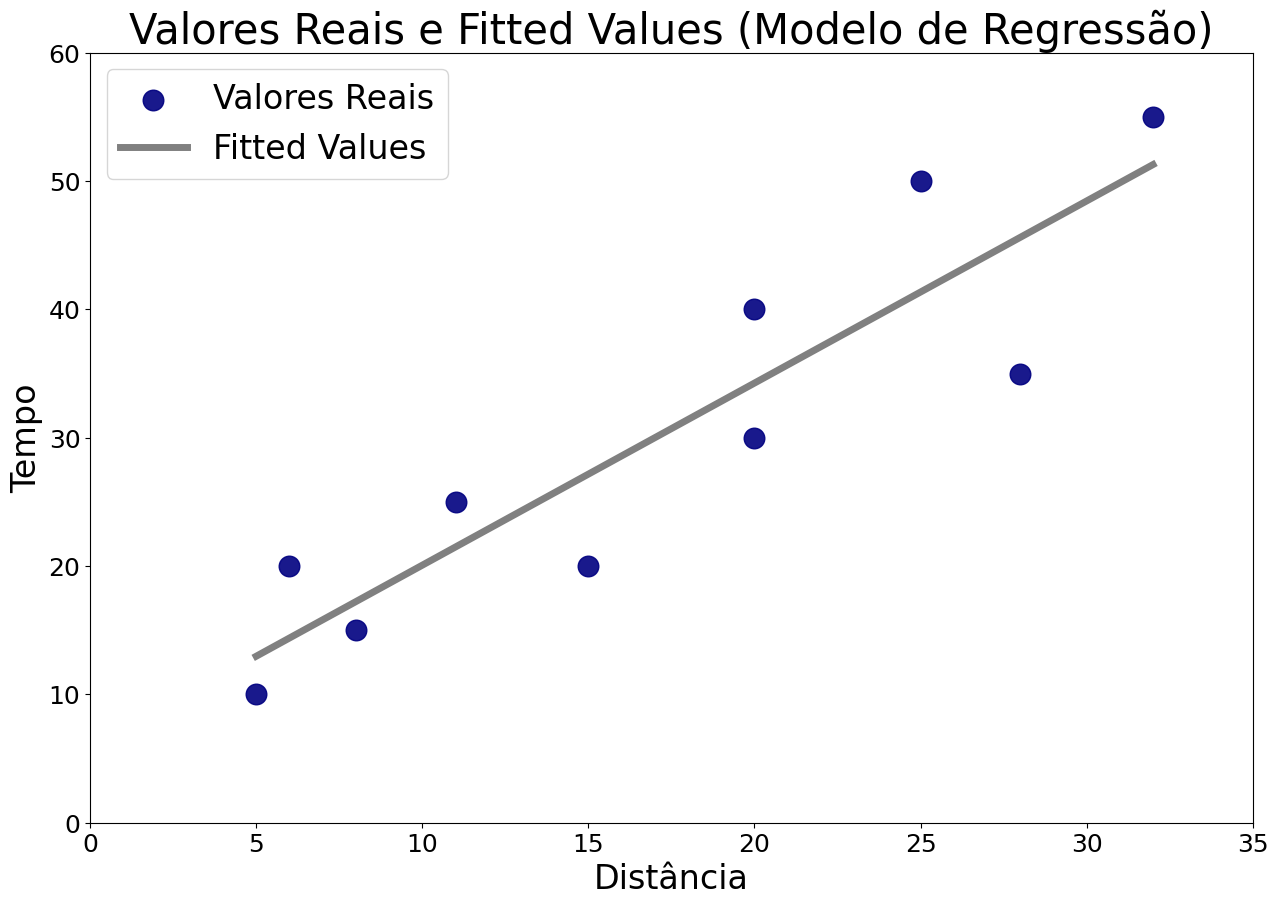

In [6]:
plt.figure(figsize=(15,10))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=False,
            scatter_kws={"color":'navy', 'alpha':0.9, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Valores Reais e Fitted Values (Modelo de Regressão)', fontsize=30)
plt.xlabel('Distância', fontsize=24)
plt.ylabel('Tempo', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24, loc='upper left')
plt.show

Gráfico de dispersão interativo (figura 'EXEMPLO1.html' salva na
#pasta do curso)

In [7]:
# Dados do gráfico
x = df_tempodist['distancia']
y = df_tempodist['tempo']

# Definição da regressão linear
slope, intercept = np.polyfit(x, y, 1)
y_trend = slope * x + intercept

fig = go.Figure()

# Inserção dos pontos (valores reais)
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(color='navy', size=20), name='Valores Reais')
    )

# Inserção da reta (fitted values)
fig.add_trace(go.Scatter(
    x=x,
    y=y_trend,
    mode='lines',
    line=dict(color='dimgray', width=5), name='Fitted Values')
    )

# Configurações de layout
fig.update_layout(
    xaxis_title='Distância',
    yaxis_title='Tempo',
    title={
        'text': 'Gráfico de Dispersão com Fitted Values',
        'font': {'size': 20, 'color': 'black', 'family': 'Arial'},
        'x': 0.5,
        'y': 0.97,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='snow',
    xaxis=dict(gridcolor='black'),
    yaxis=dict(gridcolor='black'),
    showlegend=True
)

fig.write_html('EXEMPLO1.html')

In [8]:
# Abrir o arquivo HTML no navegador
import webbrowser
webbrowser.open('regression_analysis/notebooks/EXEMPLO1.html')

True

## Estimação do modelo de regressão linear simples

In [9]:
# Estimação do modelo
modelo = sm.OLS.from_formula('tempo ~ distancia', df_tempodist).fit()

OLS_from_formula, quando usar:
- somatórias dos erros = 0
- somatória dos erros ao quadrado, é a mínima possível
- y é quanti

O professor já viu erros aqui, de empresas rodando isso com y como quali, mesmo nomeando com categorias int (1, 2, 3...)

In [10]:
# Observação dos parâmetros resultantes da estimação
modelo.summary()

/root/.local/share/virtualenvs/usp_ds_analytics-M2oHMey2/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           0.000314
Time:                        11:17:58   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.231      -4.573      16.330
distancia      1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
modelo.params

Intercept    5.878378
distancia    1.418919
dtype: float64

In [12]:
modelo.rsquared

np.float64(0.8194256756756757)

In [13]:
modelo.ess

np.float64(1638.8513513513512)

In [14]:
modelo.ssr

np.float64(361.14864864864865)

### Salvando fitted values (variável yhat) e residuals (variável erro) no dataset

In [15]:
df_tempodist['yhat'] = modelo.fittedvalues
df_tempodist['erro'] = modelo.resid
df_tempodist

,tempo,distancia,yhat,erro
0,15,8,17.229730,-2.229730
1,20,6,14.391892,5.608108
2,20,15,27.162162,-7.162162
3,40,20,34.256757,5.743243
4,50,25,41.351351,8.648649
5,25,11,21.486486,3.513514
6,10,5,12.972973,-2.972973
7,55,32,51.283784,3.716216
8,35,28,45.608108,-10.608108
9,30,20,34.256757,-4.256757


# Regressão Linear Simples

plt.cm.viridis = bom pra quem tem problemas com cores

- alpha = intercept (o ponto de encontro em y quando x é zero)
- beta = slope
- modelo.params.iloc[0]
- beta = modelo.params.iloc[1]

yhat ~ distancia "yhat em funcção de distância"

R^2 de 100% é muito estranho, perfect fit :)

pra tocar o som, no python, vc precisa incluir barras duplas

Observações
1. correlação não implica causalidade
2. os modelos trabalhados aqui são para predição na interpolação: dentro do range (min-max) estabelecidos para cada variável
3. parâmetros: $\alpha$ (intercept), $\beta$ (slope) e $R^2$

Como estimamos os parâmetros?
OLS ou MQO
- somatórias dos erros = 0
- somatória dos erros ao quadrado, é a mínima possível

### Testes estatisticos
Não adianta apenas observar o $R^2$, é preciso avaliar os testes estatísticos

Estatística F (Fischer)
$\frac {SQM / k} {SQE / n-k-1}$


- SQM = soma dos quadrados do modelo
- k = quantidade de váriais x, Df Model
- SQE = soma do quadrado dos erros, 
- n-k-1 = Df Residuals

In [16]:
n = modelo.nobs
n

10.0

In [17]:
df_modelo = modelo.df_model
df_modelo

1.0

In [18]:
df_residuos = modelo.df_resid
df_residuos

np.float64(8.0)

In [19]:
F = (modelo.ess / df_modelo) / (modelo.ssr / df_residuos)
F

np.float64(36.30308699719364)

In [20]:
# Outra maneira de calcular, através da ANOVA
from statsmodels.stats.anova import anova_lm

anova_lm(modelo)

,df,sum_sq,mean_sq,F,PR(>F)
distancia,1.0,1638.851351,1638.851351,36.303087,0.000314
Residual,8.0,361.148649,45.143581,NaN,NaN


In [21]:
anova_lm(modelo).F

distancia    36.303087
Residual           NaN
Name: F, dtype: float64

In [22]:
anova_lm(modelo).F.iloc[0]

np.float64(36.30308699719366)

Mas o que significa o F?
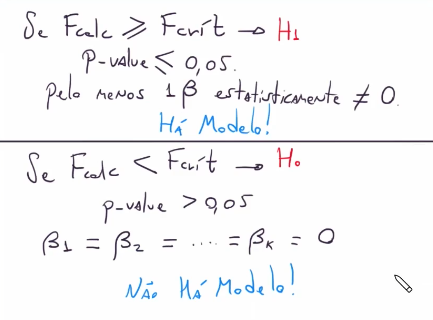

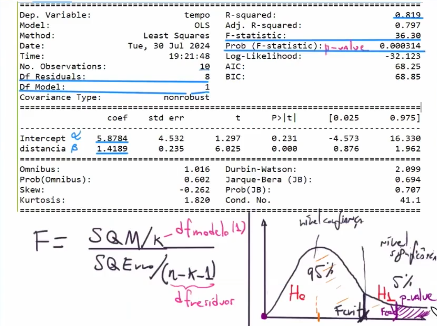

In [23]:
# Definição do p-value associado ao F calculado
from scipy.stats import f
# Cumulative distribution function
1 - f.cdf(F, df_modelo, df_residuos)

np.float64(0.0003144488029083181)

Opa, pvalue < 0 , então temos modelo!

In [24]:
# Calculando o F crítico
# Percent point function (inverse of cdf)
f.ppf(0.95, df_modelo, df_residuos)

np.float64(5.317655071578714)

(array([7.900e+01, 3.180e+02, 7.780e+02, 1.438e+03, 2.349e+03, 3.158e+03,
        3.896e+03, 4.546e+03, 5.000e+03, 5.572e+03, 5.731e+03, 5.724e+03,
        5.724e+03, 5.513e+03, 5.134e+03, 4.937e+03, 4.585e+03, 4.103e+03,
        3.716e+03, 3.548e+03, 3.077e+03, 2.746e+03, 2.477e+03, 2.187e+03,
        1.919e+03, 1.688e+03, 1.427e+03, 1.230e+03, 1.062e+03, 9.300e+02,
        7.660e+02, 7.120e+02, 5.570e+02, 4.760e+02, 4.160e+02, 4.160e+02,
        3.470e+02, 2.540e+02, 2.300e+02, 1.950e+02, 1.550e+02, 1.400e+02,
        1.040e+02, 1.030e+02, 1.020e+02, 7.100e+01, 5.200e+01, 4.300e+01,
        4.400e+01, 3.800e+01, 2.500e+01, 2.900e+01, 1.700e+01, 2.000e+01,
        1.800e+01, 1.500e+01, 7.000e+00, 1.000e+01, 5.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00, 5.000e+00, 0.000e+00, 4.000e+00, 5.000e+00,
        3.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+0

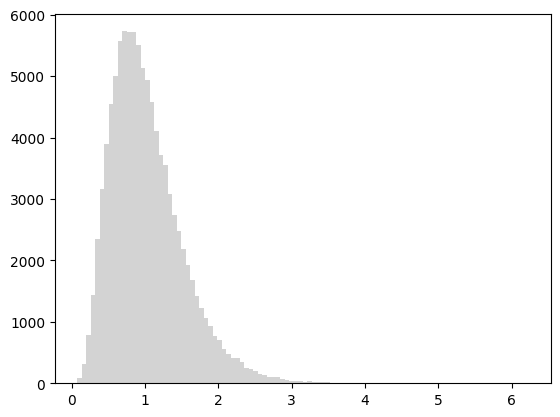

In [25]:
# F hipotético
df1 = 10 # dof 
df2 = 80

f_values = np.random.f(df1, df2, 100000)

plt.hist(f_values, bins=100, color='lightgray')

### Estatística t de Student

(array([2.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 6.0000e+00,
        6.0000e+00, 5.0000e+00, 2.4000e+01, 2.7000e+01, 1.6000e+01,
        3.6000e+01, 4.5000e+01, 6.4000e+01, 8.2000e+01, 1.1800e+02,
        1.6700e+02, 2.0900e+02, 2.6600e+02, 4.1100e+02, 4.8900e+02,
        6.8300e+02, 9.0100e+02, 1.1190e+03, 1.5180e+03, 1.8780e+03,
        2.4460e+03, 3.0230e+03, 3.8280e+03, 4.7360e+03, 5.9590e+03,
        7.0670e+03, 8.4600e+03, 1.0411e+04, 1.2421e+04, 1.4187e+04,
        1.6493e+04, 1.9350e+04, 2.1765e+04, 2.4488e+04, 2.7385e+04,
        3.0115e+04, 3.2978e+04, 3.5364e+04, 3.7639e+04, 3.9609e+04,
        4.1142e+04, 4.1986e+04, 4.2566e+04, 4.2904e+04, 4.1999e+04,
        4.1772e+04, 4.0151e+04, 3.8925e+04, 3.6734e+04, 3.3882e+04,
        3.1421e+04, 2.8095e+04, 2.5581e+04, 2.2792e+04, 1.9964e+04,
        1.7524e+04, 1.5291e+04, 1.3204e+04, 1.1071e+04, 9.2040e+03,
        7.6670e+03, 6.2700e+03, 5.0550e+03, 4.2030e+03, 3.2000e+03,
        2.7680e+03, 2.0770e+03, 1.6340e+03, 1.21

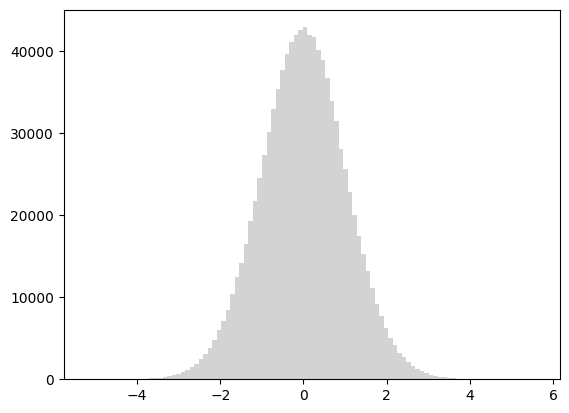

In [26]:
# Distribuição t de Student
# Hipotética
df = 40
t_values = np.random.standard_t(df, 1000000)

#plt.hist(t_values, bins=100, edgecolor='black')
plt.hist(t_values, bins=100, color='lightgray')

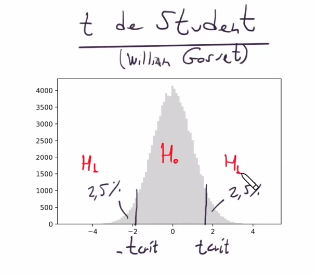

Agora não estamos discutindo a estatística do modelo, mas sim de cada parâmetro. Por isso utilizamos o t-test

### Cálculo da estatística t
- nosso exemplo, temos apenas 1 variável x (regressão simples)
- $t^2$ = F

In [27]:
# t do parâmetro beta
t_stat = np.sqrt(F)
t_stat

np.float64(6.025204311655633)

In [28]:
modelo.summary2()

/root/.local/share/virtualenvs/usp_ds_analytics-M2oHMey2/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.



<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.797   
Dependent Variable: tempo            AIC:                68.2458 
Date:               2024-08-05 11:17 BIC:                68.8510 
No. Observations:   10               Log-Likelihood:     -32.123 
Df Model:           1                F-statistic:        36.30   
Df Residuals:       8                Prob (F-statistic): 0.000314
R-squared:          0.819            Scale:              45.144  
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
Intercept   5.8784     4.5323   1.2970   0.2308   -4.5732   16.3299
distancia   1.4189     0.2355   6.0252   0.0003    0.8759    1.9620
-----------------------------------------------------------------
Omnibus:               1.016        Durbin-Watson:          2.099
Prob(Omnibus):         0.602        Jarque-Bera (JB):       0.694
Skew:                  -0.262       Prob(JB):               0.707
Kurtosis:              1.820        Condition No.:          41   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [29]:
# Cálculo do p-value da estatística t
from scipy.stats import t
t.sf(t_stat, df_residuos)*2  # para calcular de ambos os lados

np.float64(0.00031444880290832364)

### Gráfico didático para visualizar o conceito de R²

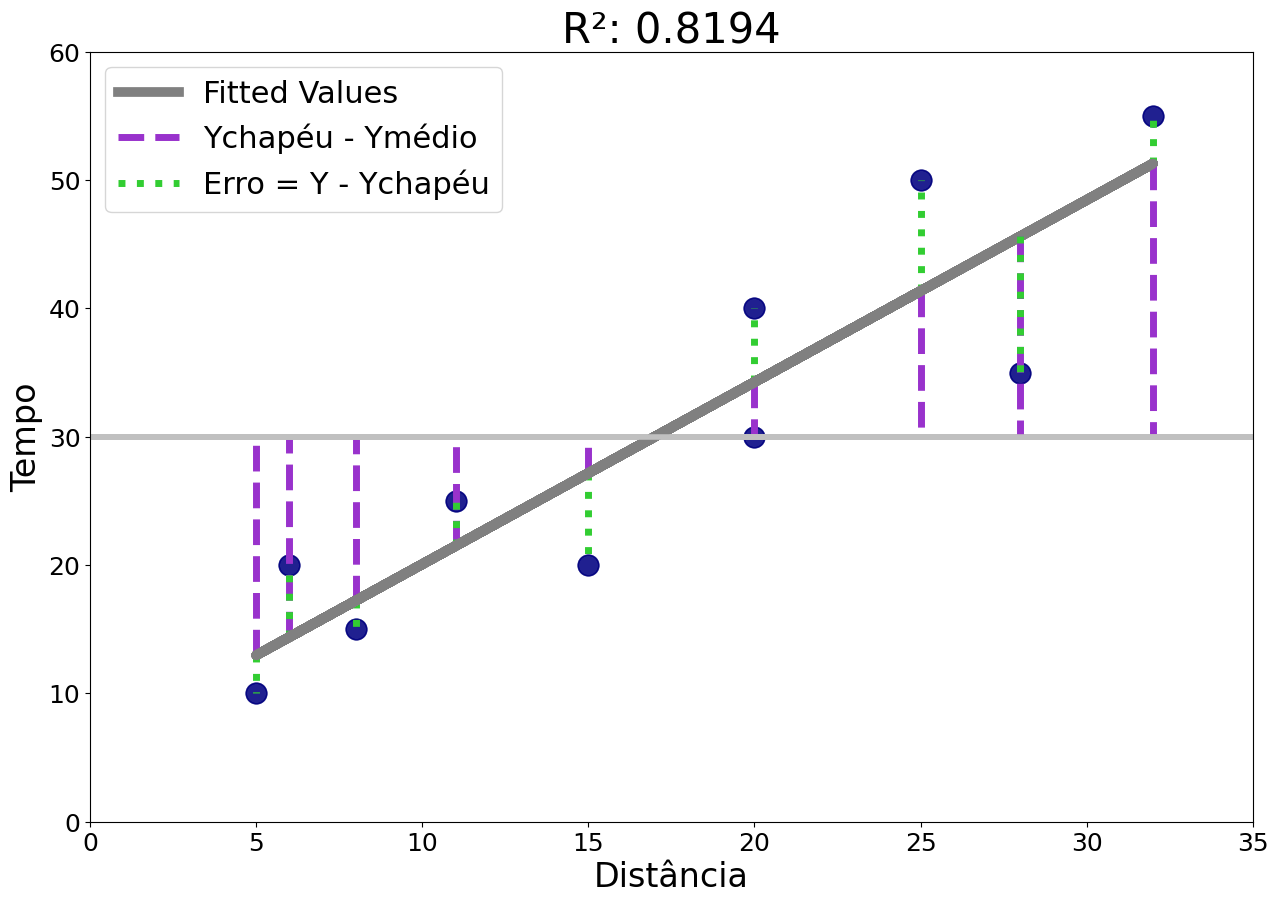

In [30]:
plt.figure(figsize=(15,10))
y = df_tempodist['tempo']
yhat = df_tempodist['yhat']
x = df_tempodist['distancia']
mean = np.full(x.shape[0] , y.mean(), dtype=int)

for i in range(len(x)-1):
    plt.plot(x, yhat, color='grey', linewidth=7)
    plt.plot([x[i], x[i]], [yhat[i], mean[i]], '--', color='darkorchid', linewidth=5)
    plt.plot([x[i], x[i]], [yhat[i], y[i]],':', color='limegreen', linewidth=5)
    plt.scatter(x, y, color='navy', s=220, alpha=0.2)
    plt.axhline(y = y.mean(), color = 'silver', linestyle = '-', linewidth=4)
    plt.title('R²: ' + str(round(modelo.rsquared, 4)), fontsize=30)
    plt.xlabel('Distância', fontsize=24)
    plt.ylabel('Tempo', fontsize=24)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim(0, 35)
    plt.ylim(0, 60)
    plt.legend(['Fitted Values', 'Ychapéu - Ymédio', 'Erro = Y - Ychapéu'],
               fontsize=22, loc='upper left')
plt.show()

### Cálculo manual do R²

In [31]:
R2 = ((df_tempodist['yhat']-
       df_tempodist['tempo'].mean())**2).sum()/(((df_tempodist['yhat']-
                                        df_tempodist['tempo'].mean())**2).sum()+
                                        (df_tempodist['erro']**2).sum())

round(R2,4)

np.float64(0.8194)

### Coeficiente de ajuste (R²) é a correlação ao quadrado

In [32]:
# Correlação de Pearson
df_tempodist[['tempo','distancia']].corr()

,tempo,distancia
tempo,1.000000,0.905221
distancia,0.905221,1.000000


In [33]:
# R²
(df_tempodist[['tempo','distancia']].corr())**2

,tempo,distancia
tempo,1.000000,0.819426
distancia,0.819426,1.000000


In [34]:
# R² de maneira direta
modelo.rsquared

np.float64(0.8194256756756757)

### Modelo auxiliar para mostrar R² igual a 100% (para fins didáticos)

In [35]:
# Estimação do modelo com yhat como variável dependente resultará em um modelo
#com R² igual a 100%
modelo_auxiliar = sm.OLS.from_formula('yhat ~ distancia', df_tempodist).fit()

# Parâmetros resultantes da estimação deste modelo didático
modelo_auxiliar.summary()

/root/.local/share/virtualenvs/usp_ds_analytics-M2oHMey2/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   yhat   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.598e+31
Date:                Mon, 05 Aug 2024   Prob (F-statistic):          1.72e-122
Time:                        11:17:58   Log-Likelihood:                 309.16
No. Observations:                  10   AIC:                            -614.3
Df Residuals:                       8   BIC:                            -613.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784   6.83e-15   8.61e+14      0.000       5.878       5.878
distancia      1.4189   3.55e-16      4e+15      0.000       1.419       1.419
==============================================================================
Omnibus:                       13.263   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                1.667
Skew:                           0.000   Prob(JB):                        0.435
Kurtosis:                       1.000   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

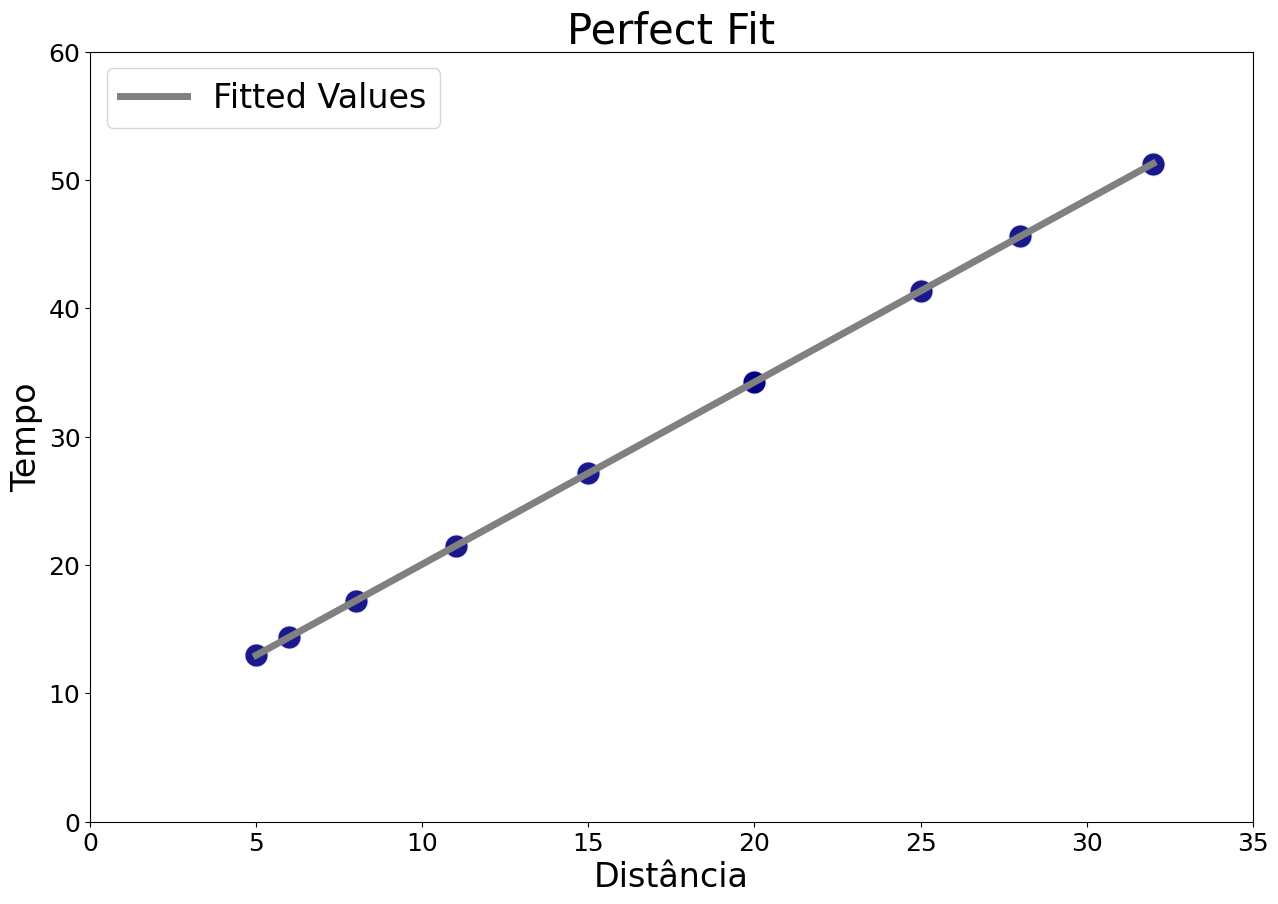

In [36]:
# Gráfico mostrando o perfect fit

plt.figure(figsize=(15,10))
sns.scatterplot(data=df_tempodist, x='distancia', y='yhat',
                color='navy', alpha=0.9, s=300)
sns.regplot(data=df_tempodist, x='distancia', y='yhat', ci=False, scatter=False,
            label='Fitted Values',
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Perfect Fit', fontsize=30)
plt.xlabel('Distância', fontsize=24)
plt.ylabel('Tempo', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(loc='upper left', fontsize=24)
plt.show

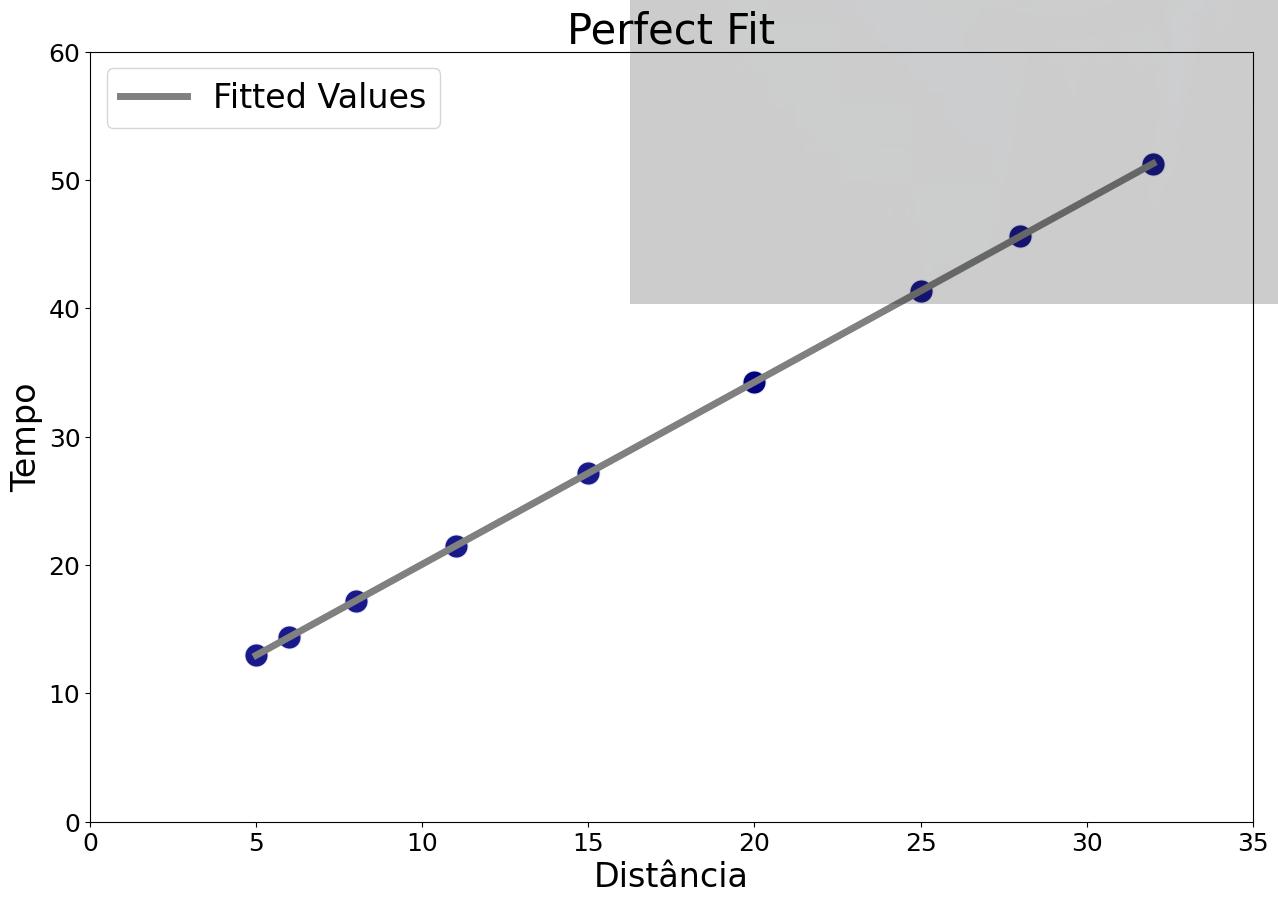

In [37]:
# Gráfico mostrando o perfect fit com figura .JPG e som .MP3
import urllib.request
from PIL import Image
from io import BytesIO

# Define a URL da imagem (FONTE: Divulgação/Warner Bros. Pictures)
url = "https://cinebuzz.uol.com.br/media/uploads/harry_potter_3_WumwIEd.jpg"

# Define os cabeçalhos da solicitação
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

# Cria uma solicitação com os cabeçalhos
request = urllib.request.Request(url, headers=headers)

# Abre a URL e lê os dados da imagem
response = urllib.request.urlopen(request)
image_data = response.read()

# Carrega a imagem em um objeto PIL (Python Imaging Library)
imagem = Image.open(BytesIO(image_data))

# Define as dimensões e a posição desejada da imagem
nova_largura = 8400  # Largura da imagem redimensionada
nova_altura = 5430  # Altura da imagem redimensionada
posicao_x = 630  # Posição horizontal da imagem
posicao_y = 600  # Posição vertical da imagem

# Redimensiona a imagem
imagem_redimensionada = imagem.resize((nova_largura, nova_altura))

# Cria o gráfico por meio da função 'regplot' do pacote 'seaborn'
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_tempodist, x='distancia', y='yhat',
                color='navy', alpha=0.9, s=300)
sns.regplot(data=df_tempodist, x='distancia', y='yhat', ci=False, scatter=False,
            label='Fitted Values',
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Perfect Fit', fontsize=30)
plt.xlabel('Distância', fontsize=24)
plt.ylabel('Tempo', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(loc='upper left', fontsize=24)
plt.show

# Adiciona a imagem redimensionada em uma posição específica do gráfico
plt.figimage(imagem_redimensionada, posicao_x, posicao_y, zorder=1, alpha=0.20)

# Exibe o gráfico com a imagem
plt.show()

voltando a aula... e ao modelo original

### Intervalos de confiança

<function matplotlib.pyplot.show(close=None, block=None)>

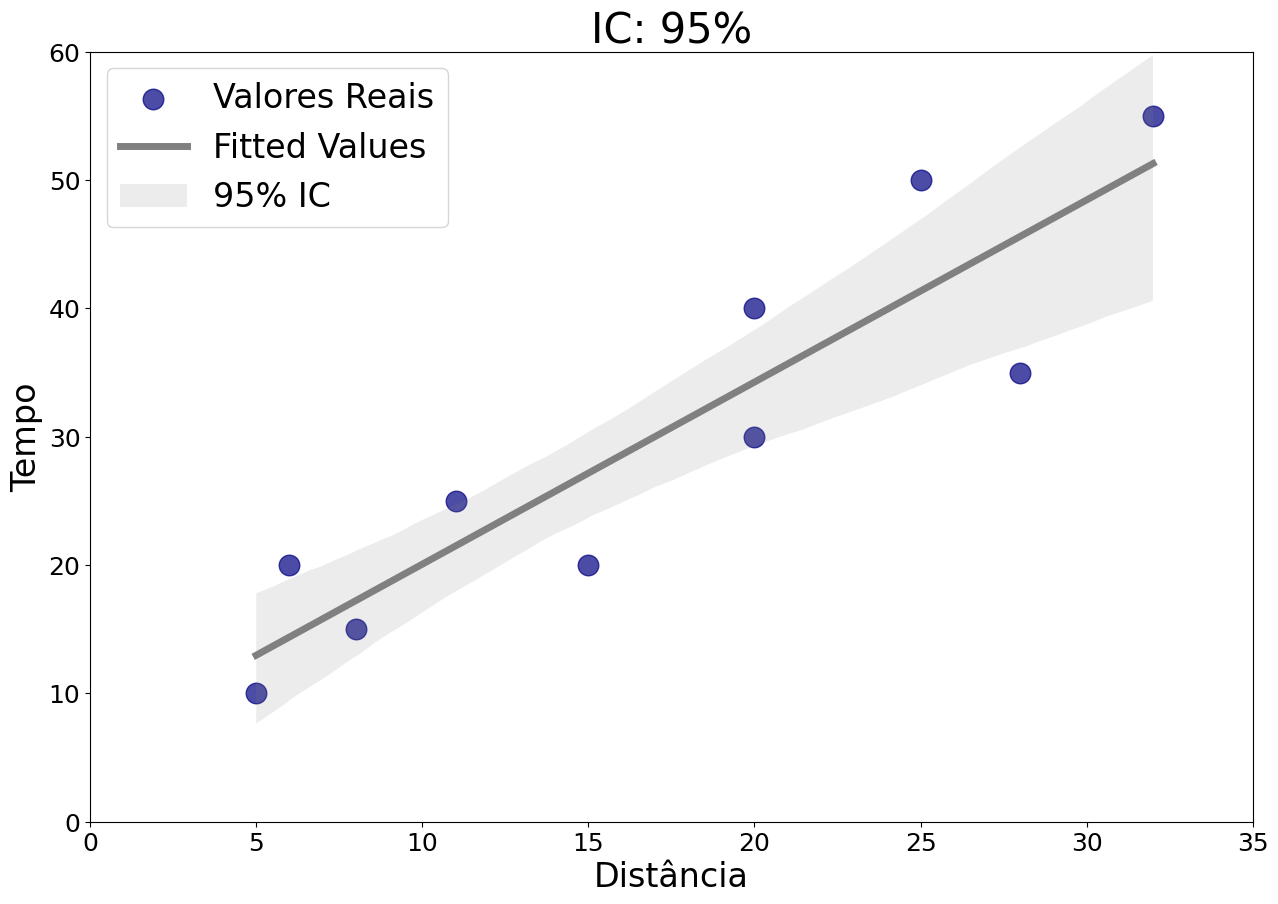

In [38]:
# Gráfico com intervalo de confiança de 95% (ci=95)

plt.figure(figsize=(15,10))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=95,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('IC: 95%', fontsize=30)
plt.xlabel('Distância', fontsize=24)
plt.ylabel('Tempo', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '95% IC'],
           fontsize=24, loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

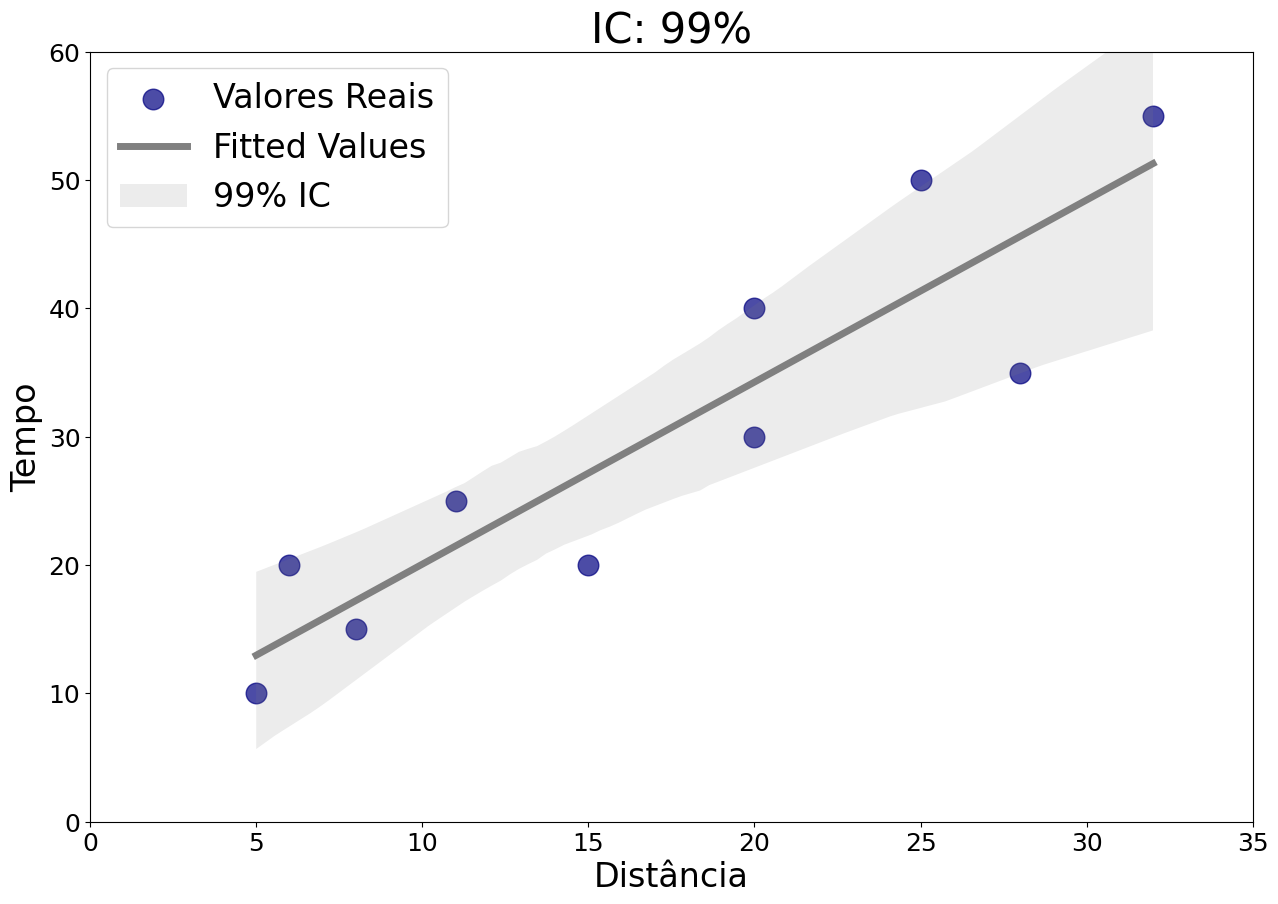

In [39]:
# Gráfico com intervalo de confiança de 99%

plt.figure(figsize=(15,10))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=99,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('IC: 99%', fontsize=30)
plt.xlabel('Distância', fontsize=24)
plt.ylabel('Tempo', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '99% IC'],
           fontsize=24, loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

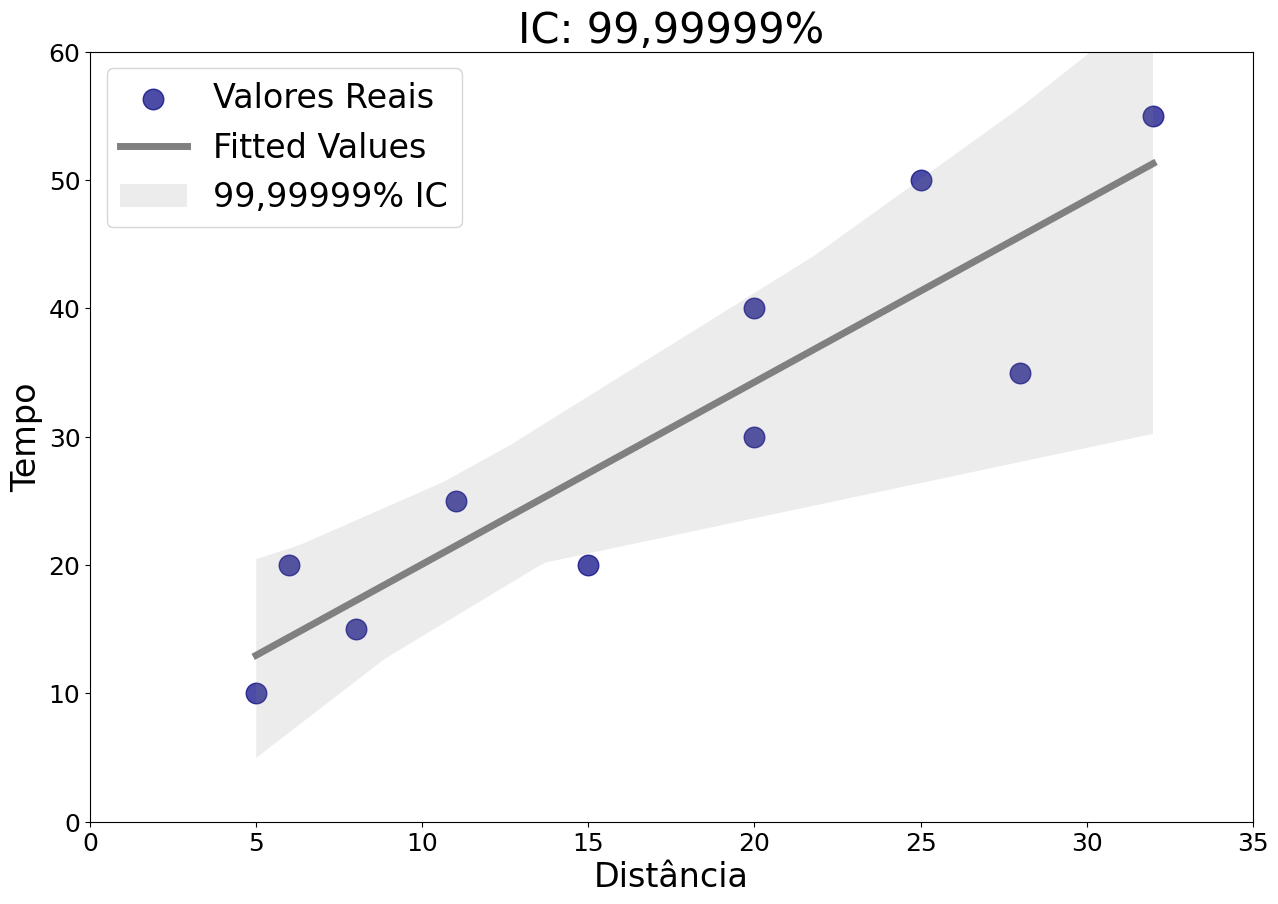

In [40]:
# Gráfico com intervalo de confiança de 99,99999%

plt.figure(figsize=(15,10))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=99.99999,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('IC: 99,99999%', fontsize=30)
plt.xlabel('Distância', fontsize=24)
plt.ylabel('Tempo', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '99,99999% IC'],
           fontsize=24, loc='upper left')
plt.show

In [41]:
# Nível de significância de 10% / Nível de confiança de 90%
modelo.conf_int(alpha=0.1)

,0,1
Intercept,-2.549702,14.306459
distancia,0.981001,1.856837


In [42]:
# Nível de significância de 5% / Nível de confiança de 95%
modelo.conf_int(alpha=0.05)

,0,1
Intercept,-4.573188,16.329944
distancia,0.875861,1.961977


In [43]:
# Nível de significância de 1% / Nível de confiança de 99%
modelo.conf_int(alpha=0.01)

,0,1
Intercept,-9.329336,21.086093
distancia,0.628735,2.209103


In [44]:
# Nível de significância de 0,00001% / Nível de confiança de 99,99999%
modelo.conf_int(alpha=0.0000001)

,0,1
Intercept,-74.960201,86.716957
distancia,-2.781409,5.619247


In [45]:
modelo.summary()

/root/.local/share/virtualenvs/usp_ds_analytics-M2oHMey2/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           0.000314
Time:                        11:18:01   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.231      -4.573      16.330
distancia      1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Fazendo predições em modelos OLS
Ex.: Qual seria o tempo gasto, em média, para percorrer a distância de 25km?


In [46]:
# Cálculo manual
5.8784 + 1.4189*(25)

41.3509

Lembrando que é na interpolação!

In [47]:
# Cálculo utilizando os próprios parâmetros estimados do modelo
modelo.params.iloc[0] + modelo.params.iloc[1]*(25)

np.float64(41.35135135135134)

In [48]:
# Maneira direta utilizando a função 'DataFrame' do pacote 'pandas' dentro
#da função 'predict'
modelo.predict(pd.DataFrame({'distancia':[25]}))


0    41.351351
dtype: float64

O alfa não ser estatisticamente significante, tem a ver com o tamanho da amostra.
Não vai igualar esse alfa a zero, assim vc vai arrumar um problema.

Muito cuidado com isso, ainda temos pessoas que fazem isso no mercado, e prejudica a avaliação (e tomada de decisão).

Vamos fazer uma nova modelagem para o mesmo exemplo, com novo dataset que contém replicações.

In [50]:
# Quantas replicações de cada linha você quer? -> função 'repeat' do 'numpy'
df_replicado = pd.DataFrame(np.repeat(df_tempodist.values, 3, axis=0))
df_replicado.columns = df_tempodist.columns
df_replicado.head()

,tempo,distancia,yhat,erro
0,15.0,8.0,17.229730,-2.229730
1,15.0,8.0,17.229730,-2.229730
2,15.0,8.0,17.229730,-2.229730
3,20.0,6.0,14.391892,5.608108
4,20.0,6.0,14.391892,5.608108


In [51]:
# Estimação do modelo com valores replicados
modelo_replicado = sm.OLS.from_formula('tempo ~ distancia',
                                       df_replicado).fit()

# Parâmetros do 'modelo_replicado'
modelo_replicado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     127.1
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           6.42e-12
Time:                        11:32:41   Log-Likelihood:                -96.369
No. Observations:                  30   AIC:                             196.7
Df Residuals:                      28   BIC:                             199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      2.423      2.426      0.022       0.916      10.841
distancia      1.4189      0.126     11.272      0.000       1.161       1.677
==============================================================================
Omnibus:                        5.437   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                2.082
Skew:                          -0.262   Prob(JB):                        0.353
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Calculando os novos intervalos de confiança

# Nível de significância de 5% / Nível de confiança de 95%
modelo_replicado.conf_int(alpha=0.05)

,0,1
Intercept,0.915844,10.840913
distancia,1.161068,1.676769


<function matplotlib.pyplot.show(close=None, block=None)>

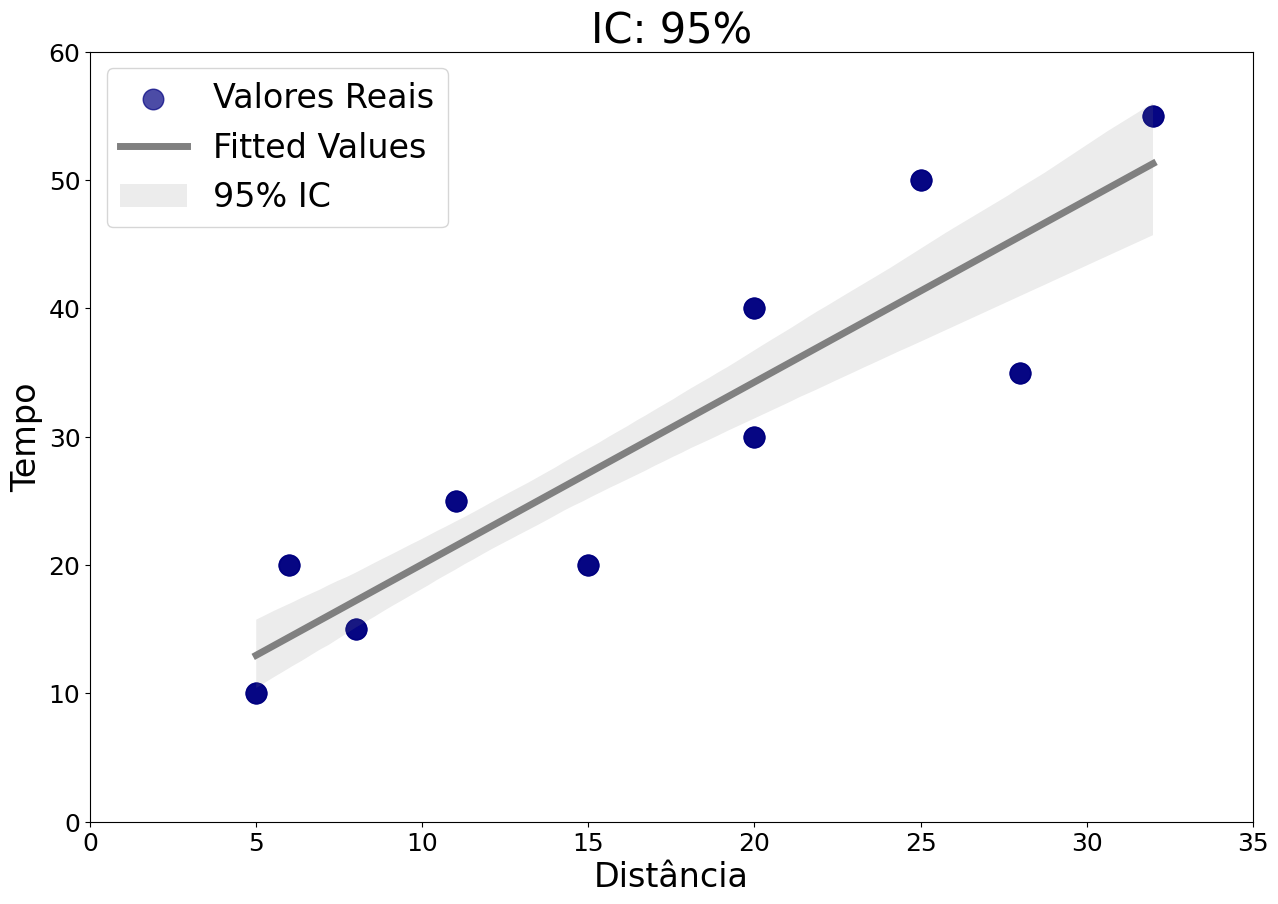

In [53]:
# ]Plotando o novo gráfico com intervalo de confiança de 95%
# Note o estreitamento da amplitude dos intervalos de confiança!

plt.figure(figsize=(15,10))
sns.regplot(data=df_replicado, x='distancia', y='tempo', marker='o', ci=95,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('IC: 95%', fontsize=30)
plt.xlabel('Distância', fontsize=24)
plt.ylabel('Tempo', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '95% IC'],
           fontsize=24, loc='upper left')
plt.show

#### Procedimento errado - pra fins didáticos

In [54]:
# PROCEDIMENTO ERRADO: ELIMINAR O INTERCEPTO QUANDO ESTE NÃO SE
#MOSTRAR ESTATISTICAMENTE SIGNIFICANTE
modelo_errado = sm.OLS.from_formula('tempo ~ 0 + distancia', df_tempodist).fit()

# Parâmetros do 'modelo_errado'
modelo_errado.summary()

/root/.local/share/virtualenvs/usp_ds_analytics-M2oHMey2/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  tempo   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              217.5
Date:                Mon, 05 Aug 2024   Prob (F-statistic):                    1.31e-07
Time:                        11:34:48   Log-Likelihood:                         -33.077
No. Observations:                  10   AIC:                                      68.15
Df Residuals:                       9   BIC:                                      68.46
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
distancia      1.6887      0.115     14.748      0.000       1.430       1.948
==============================================================================
Omnibus:                        1.407   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.783
Skew:                          -0.647   Prob(JB):                        0.676
Kurtosis:                       2.547   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Praticamente só tem alfa aí. O beta sumiu :o

In [55]:
# In[1.22]: Comparando os parâmetros do modelo inicial (objeto 'modelo')
#com o 'modelo_errado' pela função 'summary_col' do pacote
#'statsmodels.iolib.summary2'

summary_col([modelo, modelo_errado])

# Outro modo mais completo também pela função 'summary_col'
summary_col([modelo, modelo_errado],
            model_names=["MODELO INICIAL","MODELO ERRADO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,MODELO INICIAL,MODELO ERRADO
Intercept,5.8784,
,(4.5323),
distancia,1.4189***,1.6887***
,(0.2355),(0.1145)
R-squared,0.8194,0.9603
R-squared Adj.,0.7969,0.9558
N,10,10


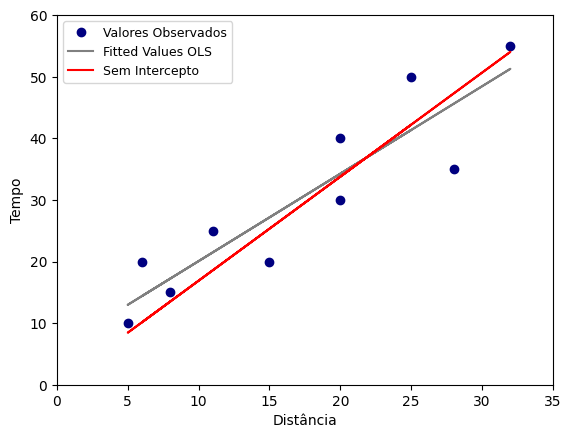

In [56]:
# In[1.23]: Gráfico didático para visualizar o viés decorrente de se eliminar
#erroneamente o intercepto em modelos regressivos

x = df_tempodist['distancia']
y = df_tempodist['tempo']

yhat = df_tempodist['yhat']
yhat_errado = modelo_errado.fittedvalues

plt.plot(x, y, 'o', color='navy')
plt.plot(x, yhat, color='gray')
plt.plot(x, yhat_errado, color='red')
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Observados','Fitted Values OLS',
            'Sem Intercepto'], fontsize=9)
plt.show()

- a somatória dos erros pode ser zero
- a somatória dos erros ao quadrado não será a mínima possível

Na estatística F é avaliado pelo menos um beta significativamente significante. Ele não vai se preocupar com alfa.

Qual estimação devo escolher? (com figura proveninente de URL)

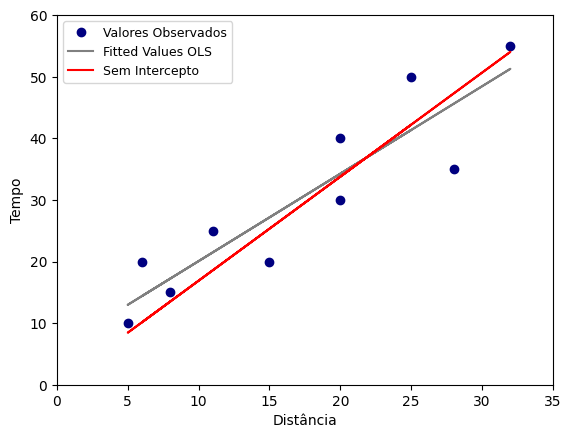

In [57]:
import urllib.request

# Definição da URL da imagem
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKNf7Jk3b2LG23egCN7w7TW0275Vd2_lhYWHLlGGizplLYc74wLukF-EbOIB8YY8YB9L0&usqp=CAU"

# Carregamento da imagem da URL
imagem = Image.open(urllib.request.urlopen(url))

# Definição das dimensões e da posição desejada da imagem
nova_largura = 700  # Largura da imagem redimensionada
nova_altura = 1000  # Altura da imagem redimensionada
posicao_x = 2500  # Posição horizontal da imagem
posicao_y = 400  # Posição vertical da imagem

# Redimensionamento da imagem
imagem_redimensionada = imagem.resize((nova_largura, nova_altura))

# Construção do gráfico
x = df_tempodist['distancia']
y = df_tempodist['tempo']

yhat = df_tempodist['yhat']
yhat_errado = modelo_errado.fittedvalues

plt.plot(x, y, 'o', color='navy')
plt.plot(x, yhat, color='gray')
plt.plot(x, yhat_errado, color='red')
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Observados','Fitted Values OLS',
            'Sem Intercepto'], fontsize=9)

# Inserção da imagem redimensionada em uma posição específica no gráfico
plt.figimage(imagem_redimensionada, posicao_x, posicao_y, zorder=1)

plt.show()

DEVO ESCOLHER O MODELO COM INTERCEPTO!

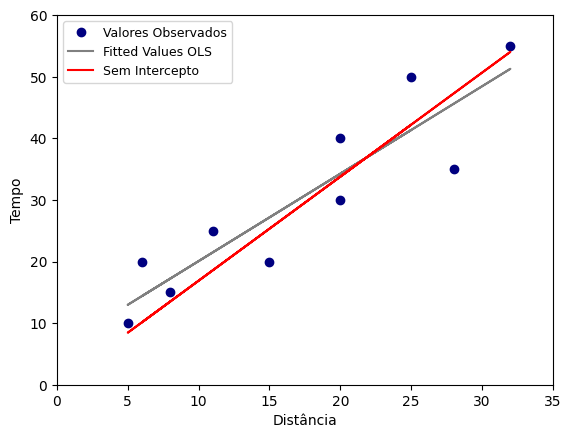

In [58]:
# Definição das URLs das imagems
url1 = "https://cdn-icons-png.flaticon.com/512/5290/5290081.png"
url2 = "https://i.pinimg.com/originals/d3/82/6a/d3826a943b0d3a9d54ec3d3cba01d0ef.png"

# Carregamento das imagens das URLs
imagem1 = Image.open(urllib.request.urlopen(url1))
imagem2 = Image.open(urllib.request.urlopen(url2))

# Definição das dimensões e das posições desejadas das imagens
nova_largura1 = 600  # Largura da imagem 1 redimensionada
nova_altura1 = 800  # Altura da imagem 1 redimensionada
posicao_x1 = 1550  # Posição horizontal da imagem 1
posicao_y1 = 1370  # Posição vertical da imagem 1

nova_largura2 = 500  # Largura da imagem 2 redimensionada
nova_altura2 = 500  # Altura da imagem 2 redimensionada
posicao_x2 = 2000  # Posição horizontal da imagem 2
posicao_y2 = 700  # Posição vertical da imagem 2

# Redimensionamento das imagens
imagem_redimensionada1 = imagem1.resize((nova_largura1, nova_altura1))
imagem_redimensionada2 = imagem2.resize((nova_largura2, nova_altura2))

# Construção do gráfico
x = df_tempodist['distancia']
y = df_tempodist['tempo']

yhat = df_tempodist['yhat']
yhat_errado = modelo_errado.fittedvalues

plt.plot(x, y, 'o', color='navy')
plt.plot(x, yhat, color='gray')
plt.plot(x, yhat_errado, color='red')
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Observados','Fitted Values OLS',
            'Sem Intercepto'], fontsize=9)

# Inserção das imagens redimensionadas em posições específicas no gráfico
plt.figimage(imagem_redimensionada1, posicao_x1, posicao_y1, zorder=1)
plt.figimage(imagem_redimensionada2, posicao_x2, posicao_y2, zorder=1)

plt.show()